
$$
    \ev{(y-\tilde{y})^2} = \ev{y^2-2y\tilde{y} + \tilde{y}^2}
$$
If we start with $\ev{y^2}$:
$$
    \ev{y^2} = \ev{(f+\epsilon)^2} = \ev{f^2} + 2f\ev{\epsilon} + \ev{\epsilon^2}
$$
Where $\ev{\epsilon} = 0$ and $\ev{\epsilon^2} = \sigma^2$, gives:
$$
    \ev{y^2} = \ev{f^2} + \sigma^2
$$
We then take $\ev{2y\tilde{y}}$
$$
    \ev{2y\tilde{y}} = 2\ev{(f+\epsilon)\tilde{y}} = 2\ev{f\tilde{y} + \epsilon\tilde{y}} = 2\ev{f\tilde{y}} + 2\ev{\epsilon\tilde{y}}
$$
where $\ev{\epsilon\tilde{y}} = 0$
$$
    \ev{2y\tilde{y}} = 2f\ev{\tilde{y}}
$$
Finally we take $\ev{\tilde{y}^2}$. Knowing $var(\tilde{y}) = \ev{\tilde{y}^2} - \ev{\tilde{y}}^2$, we get $\ev{\tilde{y}^2} = var(\tilde{y}) + \ev{\tilde{y}}^2$.

Now we can gather up the separate parts:
$$
    \begin{split}
        \ev{(y-\tilde{y})^2} = \ev{f^2} + \sigma^2 - 2f\ev{\tilde{y}} + var(\tilde{y})  - \ev{\tilde{y}}^2 \\
        = \ev{f^2} - 2f\ev{\tilde{y}} + \ev{\tilde{y}}^2 + var(\tilde{y}) + \sigma^2\\
        = \ev{(f - \tilde{y})^2} + var(\tilde{y}) + \sigma^2
    \end{split}
$$
Using the definition $bias(\tilde{y}) = \ev{(y - \tilde{y})^2}$, we can make the approximation $f \approxeq y$, we get:
$$
    \ev{(y-\tilde{y})^2} = bias(\tilde{y}) + var(\tilde{y}) + \sigma^2
$$

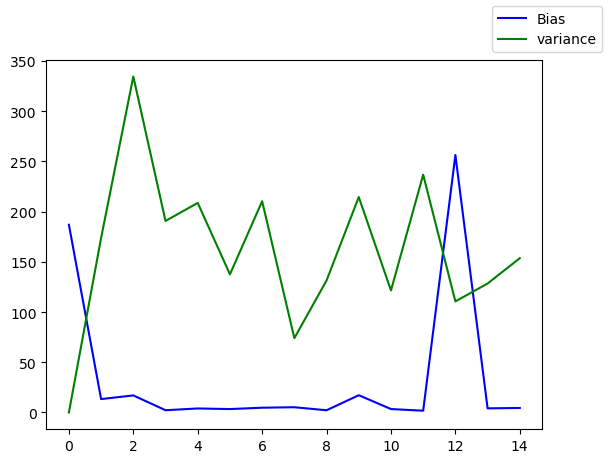

In [107]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

np.random.seed(1337)

n = 50

x = np.linspace(-2,3,50).reshape(-1, 1) 
y = x**3+5*x-10 + np.random.normal(0,0.1, x.shape)*15

todeg = 15

bias_list = []
var_list = []


for deg in range(todeg):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)

    model = make_pipeline(PolynomialFeatures(degree=deg), LinearRegression(fit_intercept=False))

    y_pred = model.fit(x_train,y_train).predict(x_test) 

    bias = np.mean( (y_test - y_pred)**2)
    variance = np.var(y_pred)

    bias_list.append(bias)
    var_list.append(variance)

# plt.plot(x, y, "bo")
# plt.plot(x_test, y_pred, "rx")

fig, ax = plt.subplots()


ax.plot(bias_list, "b-", label="Bias")
ax.plot(var_list, "g-", label="variance")

fig.legend()

plt.show()
